In [10]:
import zipfile
!unzip train.zip
!unzip test.zip

Archive:  /content/train.zip
replace train/control/sub-001_event-1_topograph1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train/control/sub-001_event-1_topograph1.png  
  inflating: train/control/sub-001_event-11_topograph2.png  
  inflating: train/control/sub-001_event-12_topograph3.png  
  inflating: train/control/sub-001_event-13_topograph4.png  
  inflating: train/control/sub-001_event-14_topograph5.png  
  inflating: train/control/sub-001_event-15_topograph6.png  
  inflating: train/control/sub-001_event-16_topograph7.png  
  inflating: train/control/sub-001_event-17_topograph8.png  
  inflating: train/control/sub-001_event-2_topograph9.png  
  inflating: train/control/sub-001_event-3_topograph10.png  
  inflating: train/control/sub-001_event-4_topograph11.png  
  inflating: train/control/sub-001_event-5_topograph12.png  
  inflating: train/control/sub-001_event-6_topograph13.png  
  inflating: train/control/sub-001_event-keyboard0_topograph14.png  
  inflating: trai

In [11]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch


def get_data():
    transform =transforms.Compose([
                    #transforms.Resize((32,32)),
                    transforms.ToTensor()])
    train_set = datasets.ImageFolder('train', transform=transform)
    print(train_set[0][0].shape)
    train = DataLoader(train_set, batch_size=32, shuffle=True)
    return train

train = get_data()



torch.Size([3, 504, 504])


In [54]:
class Depress_Net(nn.Module):
    def __init__(self):
        super(Depress_Net, self).__init__()
        self.block1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=6, kernel_size=50), nn.BatchNorm2d(6),nn.ReLU()
                      )
        self.block2 = nn.Sequential(nn.Conv2d(in_channels=6, out_channels=12, kernel_size=25 ), nn.BatchNorm2d(12),nn.ReLU(),
                      )
        self.block3 = nn.Sequential(nn.Conv2d(in_channels=12, out_channels=24, kernel_size=15 ), nn.BatchNorm2d(24),nn.ReLU(),
                      )
        self.block4 = nn.Sequential(nn.Conv2d(in_channels=24, out_channels=24, kernel_size=15 ), nn.BatchNorm2d(24),nn.ReLU(),
                      )    
        self.block5 = nn.Sequential(nn.Linear(14*14*24, 1000),  nn.ReLU(), nn.Linear(1000, 500),nn.ReLU(),nn.Linear(500, 50),nn.ReLU(),nn.Linear(50, 2) )
        self.mp = nn.MaxPool2d(2)
    def forward(self, x):
        x = self.block1(x)
        #print(x.shape)
        x = self.mp(x)
        #print(x.shape)
        x = self.block2(x)
        #print(x.shape)
        x = self.mp(x)
        #print(x.shape)
        x = self.block3(x)
        #print(x.shape)
        x = self.mp(x)
        #print(x.shape)
        x = self.block4(x)
        #print(x.shape)
        x = self.mp(x)
        #print(x.shape)
        x = x.reshape(x.size(0), -1)
        #print(x.shape)
        x = self.block5(x)
        #print(x.shape)
        return x

Epoch [1/3], Step [1/45], Loss: 0.7281, Accuracy: 31.25%
Epoch [1/3], Step [2/45], Loss: 0.8960, Accuracy: 62.50%
Epoch [1/3], Step [3/45], Loss: 0.7121, Accuracy: 40.62%
Epoch [1/3], Step [4/45], Loss: 0.5583, Accuracy: 68.75%
Epoch [1/3], Step [5/45], Loss: 1.0045, Accuracy: 65.62%
Epoch [1/3], Step [6/45], Loss: 0.6873, Accuracy: 56.25%
Epoch [1/3], Step [7/45], Loss: 0.6541, Accuracy: 68.75%
Epoch [1/3], Step [8/45], Loss: 0.6220, Accuracy: 68.75%
Epoch [1/3], Step [9/45], Loss: 0.7908, Accuracy: 46.88%
Epoch [1/3], Step [10/45], Loss: 0.6760, Accuracy: 65.62%
Epoch [1/3], Step [11/45], Loss: 0.6600, Accuracy: 62.50%
Epoch [1/3], Step [12/45], Loss: 0.5904, Accuracy: 75.00%
Epoch [1/3], Step [13/45], Loss: 0.5601, Accuracy: 75.00%
Epoch [1/3], Step [14/45], Loss: 0.5111, Accuracy: 78.12%
Epoch [1/3], Step [15/45], Loss: 0.6260, Accuracy: 75.00%
Epoch [1/3], Step [16/45], Loss: 0.6896, Accuracy: 68.75%
Epoch [1/3], Step [17/45], Loss: 0.7027, Accuracy: 53.12%
Epoch [1/3], Step [18/4

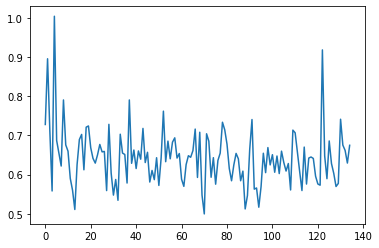

Finished Training


In [55]:
learning_rate = 0.0001
mom = .9
num_epochs = 3
net = Depress_Net()
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(model.parameters(), lr=learning_rate)
optimizer = optim.RMSprop(net.parameters(), lr=learning_rate)
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)

if torch.cuda.is_available(): # Checking if we can use GPU
    model = net.cuda()
    criterion = criterion.cuda()

# Train the model from https://adventuresinmachinelearning.com/convolutional-neural-networks-tutorial-in-pytorch/
total_step = len(train)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train):
        #train_imshow(images, labels)
        # Run the forward pass
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 1 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
plt.plot(loss_list, label='Training loss')
plt.show()
print('Finished Training')




In [56]:
transform =transforms.Compose([
                    #transforms.Resize((32,32)),
                    transforms.ToTensor()])
test_set = datasets.ImageFolder('test', transform=transform)
print(test_set[0][0].shape)
test = DataLoader(test_set, batch_size=20, shuffle=False)

torch.Size([3, 504, 504])


In [57]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train:
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(total)
    print('Accuracy of the model on the train images: {} %'.format((correct / total) * 100))

1414
Accuracy of the model on the train images: 65.7001414427157 %


In [58]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test:
        images = images.cuda()
        labels = labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 20 test images: {} %'.format((correct / total) * 100))

Test Accuracy of the model on the 20 test images: 50.0 %
